In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import time
import operator
import re

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
df = pd.read_csv('data10/used_mobile_phone.csv')
df

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [4]:
df.isna().sum()

create_date      0
price            0
text             0
phone_model      0
factory_price    0
maker            0
price_index      0
dtype: int64

### date 피처 확인

In [5]:
df['create_date']

0        2017-03-19  4 35 00 PM
1       2016-10-26  12 08 00 PM
2       2016-10-25  12 52 00 PM
3       2017-03-23  11 14 00 PM
4        2016-04-11  7 35 00 PM
                 ...           
4946    2016-10-10  11 29 00 AM
4947    2016-10-24  10 03 00 PM
4948    2016-09-19  10 15 00 AM
4949    2016-10-05  12 22 00 AM
4950    2016-09-26  11 37 00 AM
Name: create_date, Length: 4951, dtype: object

In [6]:
# 월까지만 가져온다.
df['month'] = df['create_date'].apply(lambda x : x[:7])
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

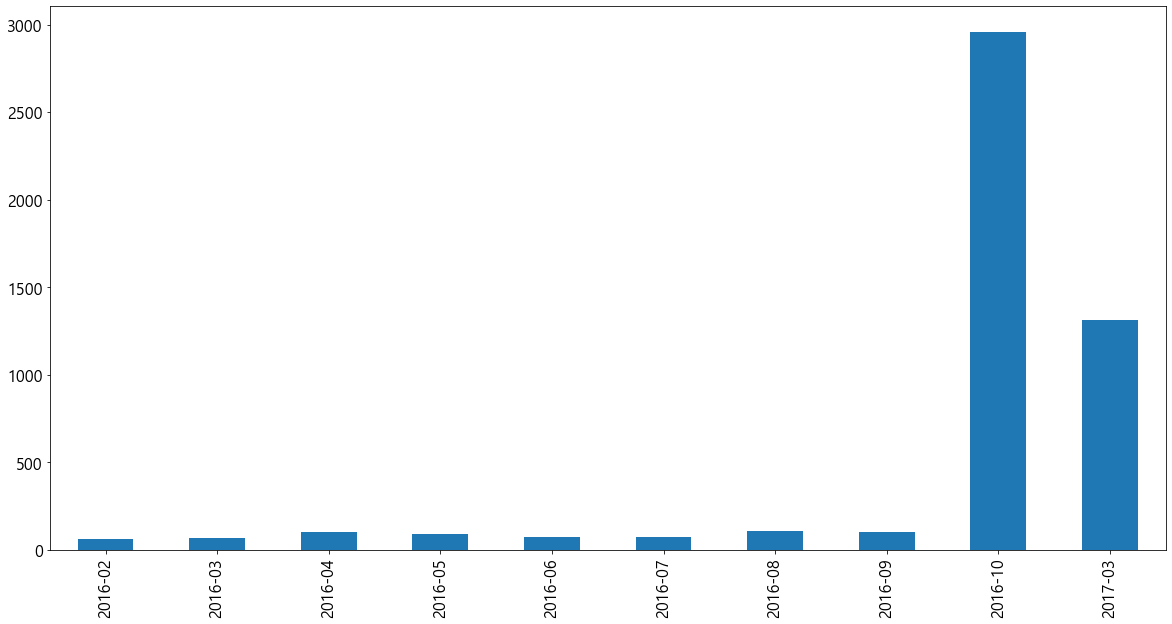

In [7]:
# 월별 거래량을 시각화한다.
a1 = df['month'].value_counts()
a1.sort_index(inplace=True)
a1.plot.bar()
plt.show()

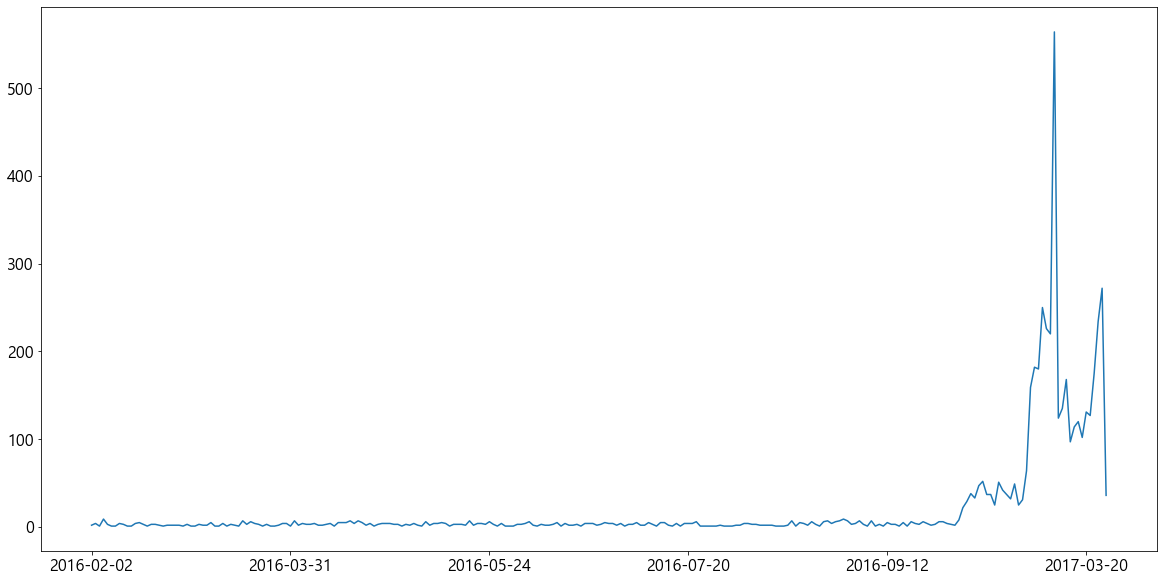

In [8]:
# 일별 거래 횟수를 계산하여 그래프로 시각화한다.
df_day = df['create_date'].apply(lambda x : x[:10])
a1 = df_day.value_counts()
a1.sort_index(inplace=True)
a1.plot()
plt.show()

### 가격 피처 탐색

<AxesSubplot:>

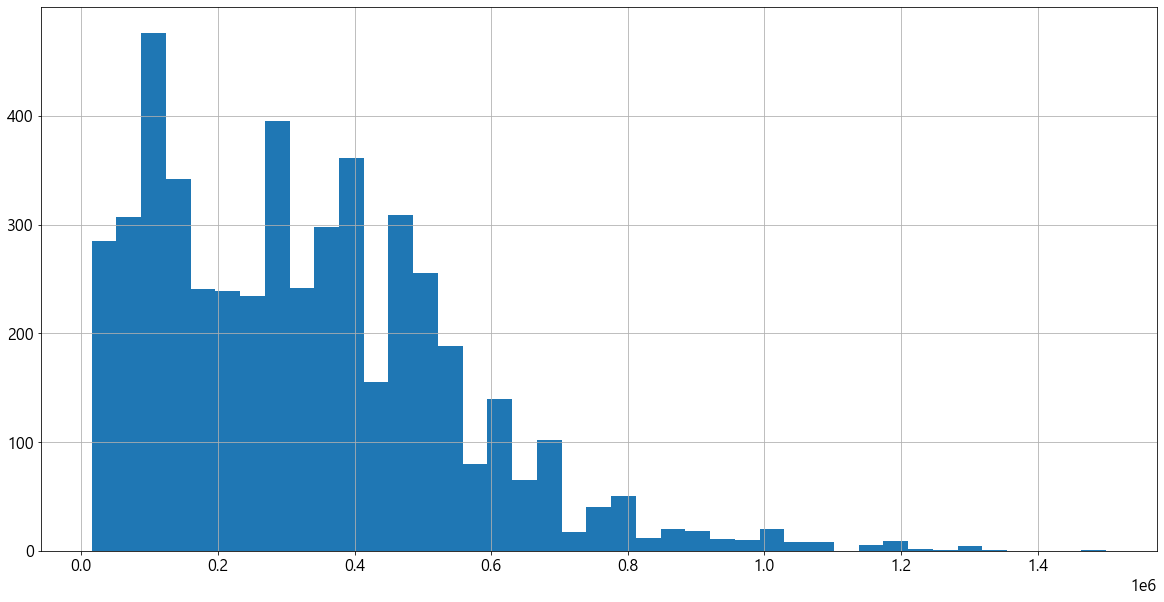

In [9]:
# 가격의 분포를 확인한다.
df['price'].hist(bins='auto')

In [10]:
# 핸드폰 기종(phone_model)별 가격의 평균과 표준편차를 구한다.
df_price_model_mean = df.groupby('phone_model')['price'].transform(lambda x : np.mean(x))
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x : np.std(x))

print(df_price_model_mean)
print('-----------------')
print(df_price_model_std)

0       4.545240e+05
1       2.972500e+05
2       2.346903e+05
3       3.300745e+05
4       1.279354e+05
            ...     
4946    1.067273e+06
4947    1.072353e+06
4948    1.072353e+06
4949    1.067273e+06
4950    8.010000e+05
Name: price, Length: 4951, dtype: float64
-----------------
0       136082.920405
1        63678.391154
2        55507.645913
3       120779.331875
4       149124.347567
            ...      
4946    189932.567416
4947    172235.454838
4948    172235.454838
4949    189932.567416
4950    214312.331145
Name: price, Length: 4951, dtype: float64


<AxesSubplot:>

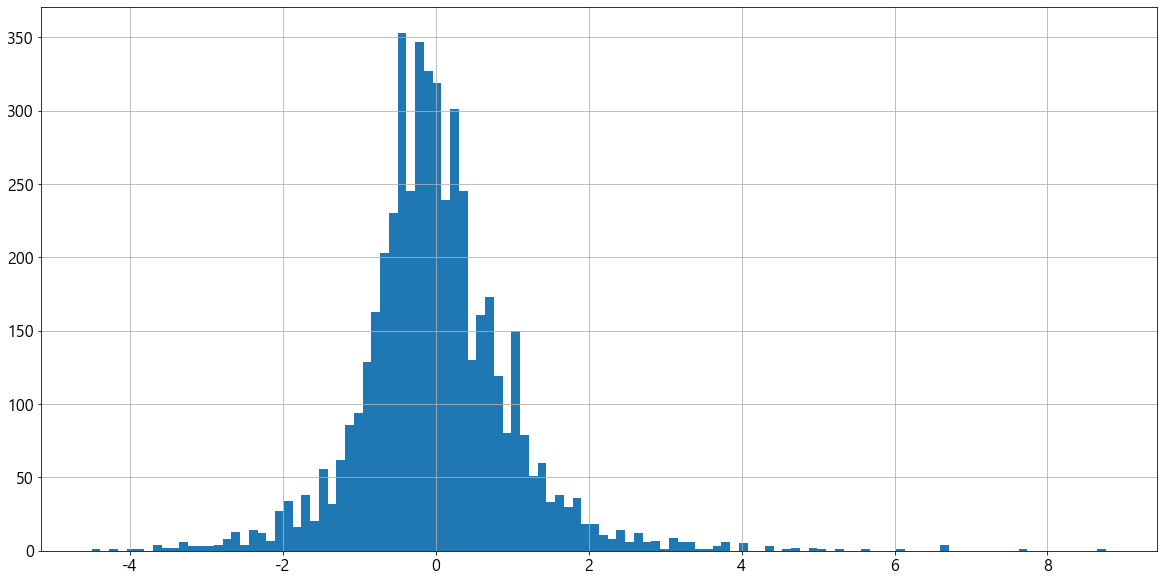

In [11]:
# 위에서 구한 평균과 표준 편차를 이용해 z-score를 구한다.
# 해당 데이터의 가격이 기종별 평균에 비해 어느정도 높거나 낮은지를 알 수 있게 
# 한다.
df_price_model_z_score = (df['price'] - df_price_model_mean) / df_price_model_std
df_price_model_z_score.hist(bins='auto')

### 출고가 피처 탐색

<AxesSubplot:>

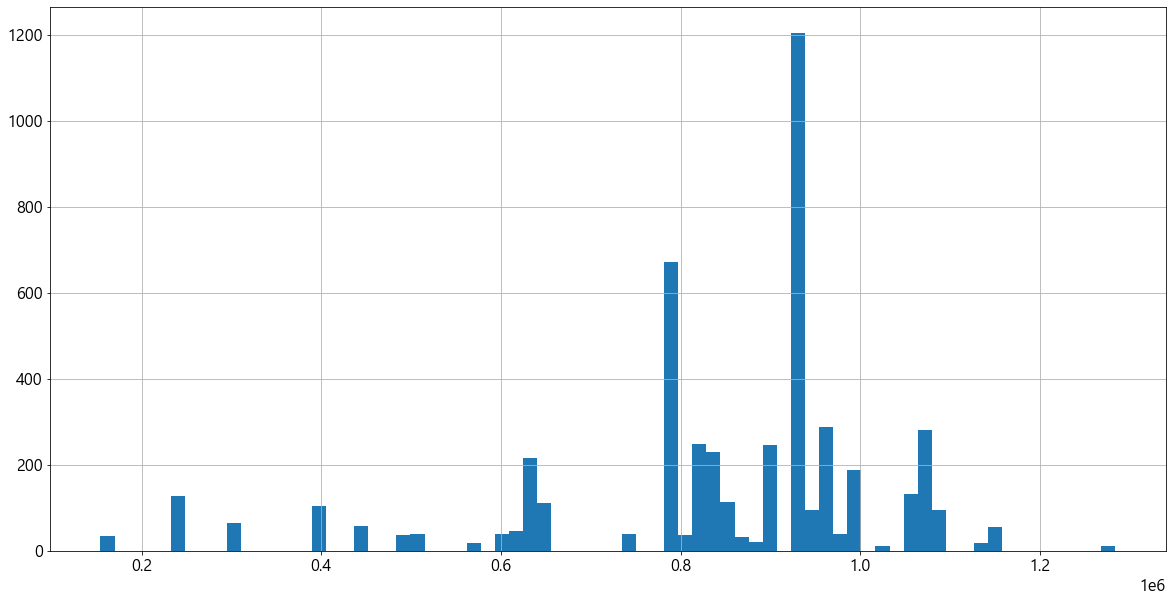

In [12]:
# 출고가의 분포를 확인한다.
df['factory_price'].hist(bins='auto')

<AxesSubplot:xlabel='factory_price', ylabel='price'>

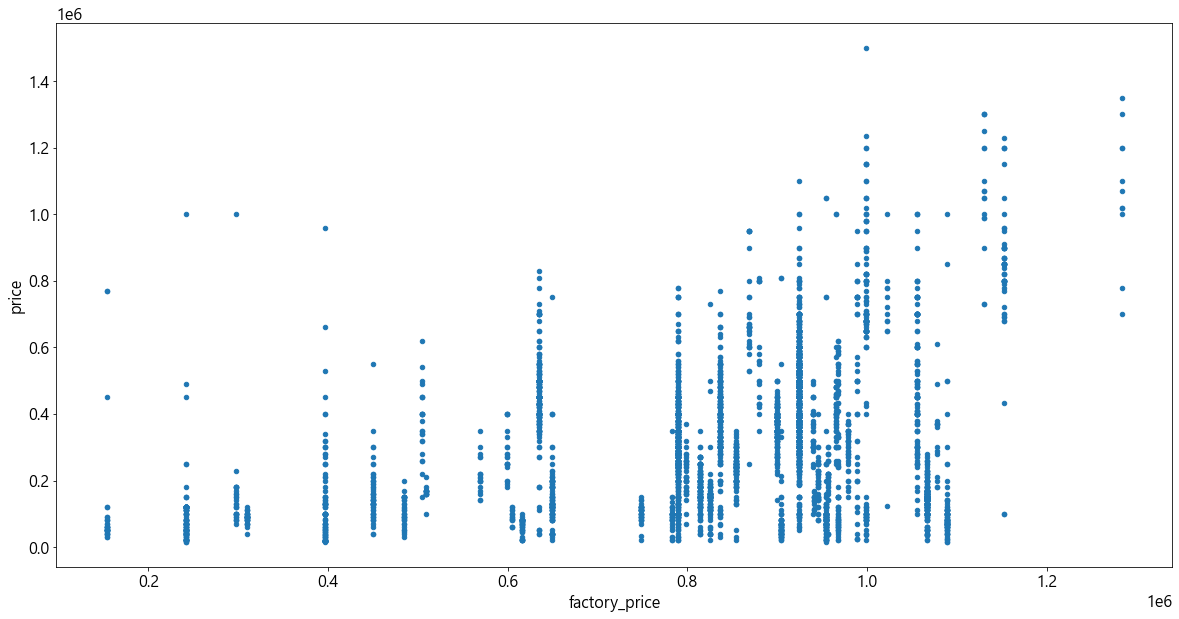

In [13]:
# 출고가와 중고가격 피처를 산점도로 시각화여 상관관계를 살펴본다.
df.plot.scatter(x='factory_price', y='price')

출고가가 높으면 중고가도 높게 형성된다.

### 핸드폰 모델 피처 탐색

In [14]:
# 기종별 데이터 개수를 집계한다.
model_counts = df['phone_model'].value_counts()
model_counts

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 6s Plus 16gb      12
iphone 7 plus 32gb       12
iphone 7 plus 256gb      11
iphone 4s 16gb           11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64

In [15]:
# 요약 통계 정보
model_counts.describe()

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x202e8dd37c0>,
 'caps': [<matplotlib.lines.Line2D at 0x202e8dd3e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x202e8dd3460>],
 'medians': [<matplotlib.lines.Line2D at 0x202e8de1580>],
 'fliers': [<matplotlib.lines.Line2D at 0x202e8de1910>],
 'means': []}

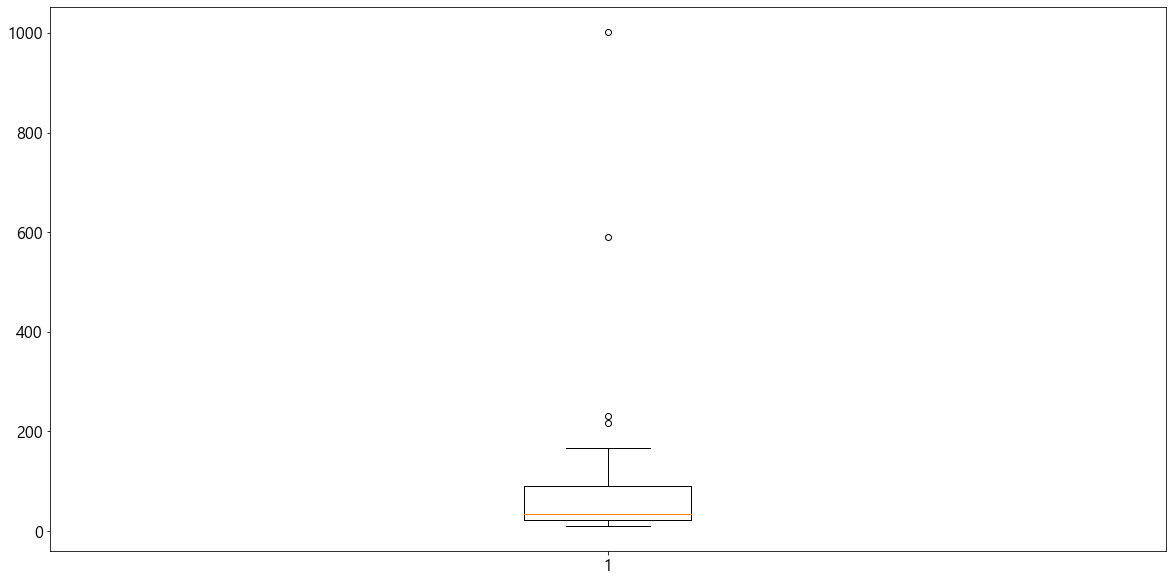

In [16]:
plt.boxplot(model_counts)

### 제조사 피처 탐색

In [17]:
maker_counts = df['maker'].value_counts()
maker_counts

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x202e966c070>,
 'caps': [<matplotlib.lines.Line2D at 0x202e966c730>,
 'boxes': [<matplotlib.lines.Line2D at 0x202e965fca0>],
 'medians': [<matplotlib.lines.Line2D at 0x202e966cdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x202e9678190>],
 'means': []}

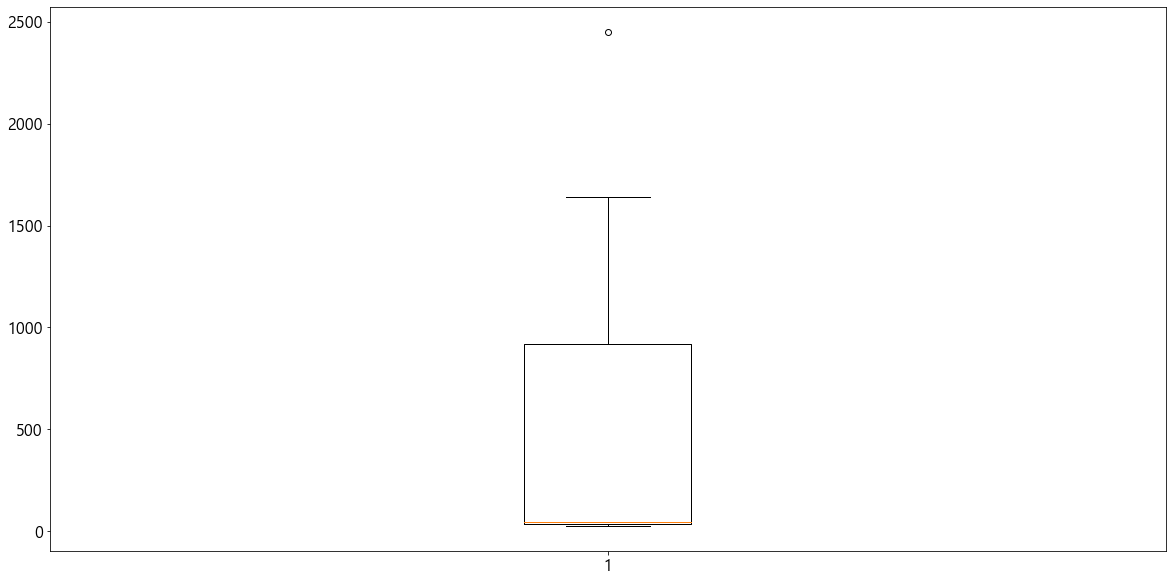

In [18]:
plt.boxplot(maker_counts)

### 물가 피처

In [19]:
df['price_index'].value_counts()

103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

### 가격 예측

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [21]:
# 데이터 준비
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 
         'month']]
df

,price,phone_model,factory_price,maker,price_index,month
0,550000.0,iphone 6 64gb,924000,apple,95.96,2017-03
1,380000.0,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,300000.0,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,290000.0,lg g5 32gb,836000,lg,95.96,2017-03
4,280000.0,lg u 32gb,396000,lg,102.59,2016-04
...,...,...,...,...,...,...
4946,1300000.0,iphone 7 plus 256gb,1283700,apple,103.05,2016-10
4947,1300000.0,iphone 7 256gb,1130800,apple,103.05,2016-10
4948,1300000.0,iphone 7 256gb,1130800,apple,103.05,2016-09
4949,1350000.0,iphone 7 plus 256gb,1283700,apple,103.05,2016-10


In [22]:
# 문자열 컬럼을 원-핫 인코딩해준다.
df = pd.get_dummies(df, columns=['phone_model', 'maker', 'month'])
df

,price,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,...,month_2016-02,month_2016-03,month_2016-04,month_2016-05,month_2016-06,month_2016-07,month_2016-08,month_2016-09,month_2016-10,month_2017-03
0,550000.0,924000,95.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,380000.0,979000,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,300000.0,854000,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,290000.0,836000,95.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,280000.0,396000,102.59,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1300000.0,1283700,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4947,1300000.0,1130800,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4948,1300000.0,1130800,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4949,1350000.0,1283700,103.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# 입력과 결과로 나눈다.
X = df.drop('price', axis=1)
y = df['price']
display(X)
display(y)

,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,phone_model_galaxy grand max 16gb,...,month_2016-02,month_2016-03,month_2016-04,month_2016-05,month_2016-06,month_2016-07,month_2016-08,month_2016-09,month_2016-10,month_2017-03
0,924000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,979000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,854000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,836000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,396000,102.59,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1283700,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4947,1130800,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4948,1130800,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4949,1283700,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


0        550000.0
1        380000.0
2        300000.0
3        290000.0
4        280000.0
          ...    
4946    1300000.0
4947    1300000.0
4948    1300000.0
4949    1350000.0
4950    1500000.0
Name: price, Length: 4951, dtype: float64

In [24]:
# 학습과 검증용으로 나눈다.
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
# 교차 검증
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# 폴드 생성
kfold = KFold(n_splits=20, shuffle=True, random_state=1)

# 하이퍼 파라미터 튜닝
params = {
    # 트리의 개수
    'n_estimators' : [10, 50, 100, 150, 200],
    # 질문 깊이
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# 모델 생성
model = XGBRegressor(silent=True, verbosity=0, tree_method='gpu_hist')

# 하이퍼파라미터 튜닝
grid = GridSearchCV(model, param_grid=params, scoring='r2', cv=kfold)
grid.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
print(f'최적의 모델 평균 성능 : {grid.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7073796985025013


In [26]:
# 최적의 하이퍼파라미터가 셋팅된 모델을 추출한다.
best_model = grid.best_estimator_
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
             subsample=1, tree_method='gpu_hist', validate_parameters=1,
             verbosity=0)

In [27]:
# 교차검증
result = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=kfold)
result

array([0.69494793, 0.70096764, 0.79294216, 0.80887066, 0.76368625,
       0.75108901, 0.78004742, 0.69193369, 0.5845796 , 0.59681522,
       0.71042007, 0.73535245, 0.61463165, 0.7377358 , 0.64287159,
       0.82641276, 0.64567273, 0.62787847, 0.72551647, 0.71522241])

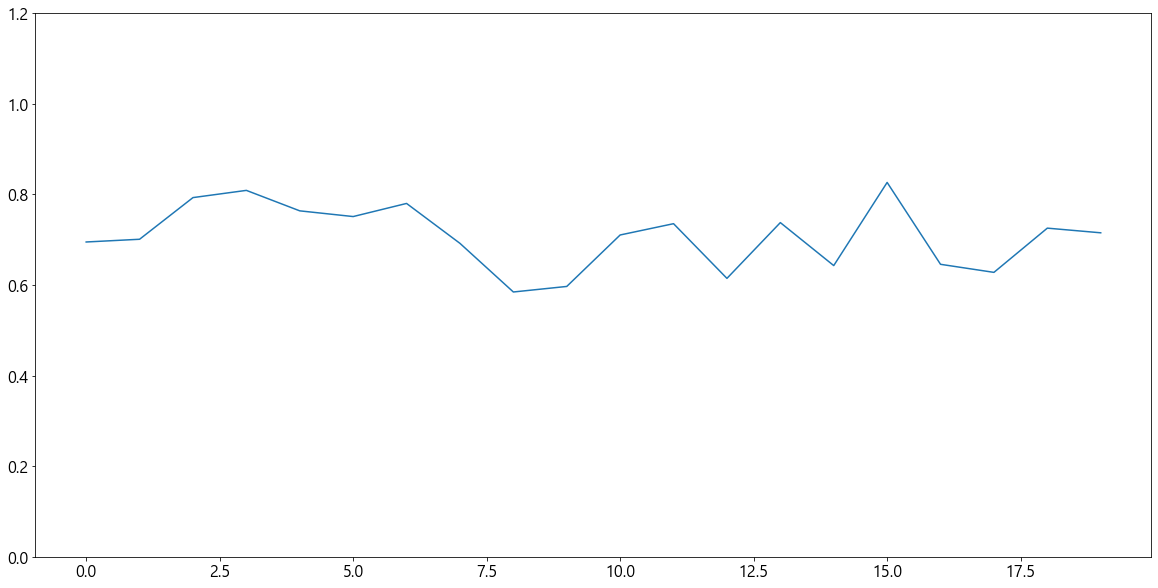

In [29]:
plt.plot(result)
plt.ylim(0, 1.2)
plt.show()

In [31]:
# 예측 결과를 추출해서 평가한다.
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(x_test)

In [32]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

11555117568.011106
12208764813.870752
0.7566596627580917
0.7349121070193596


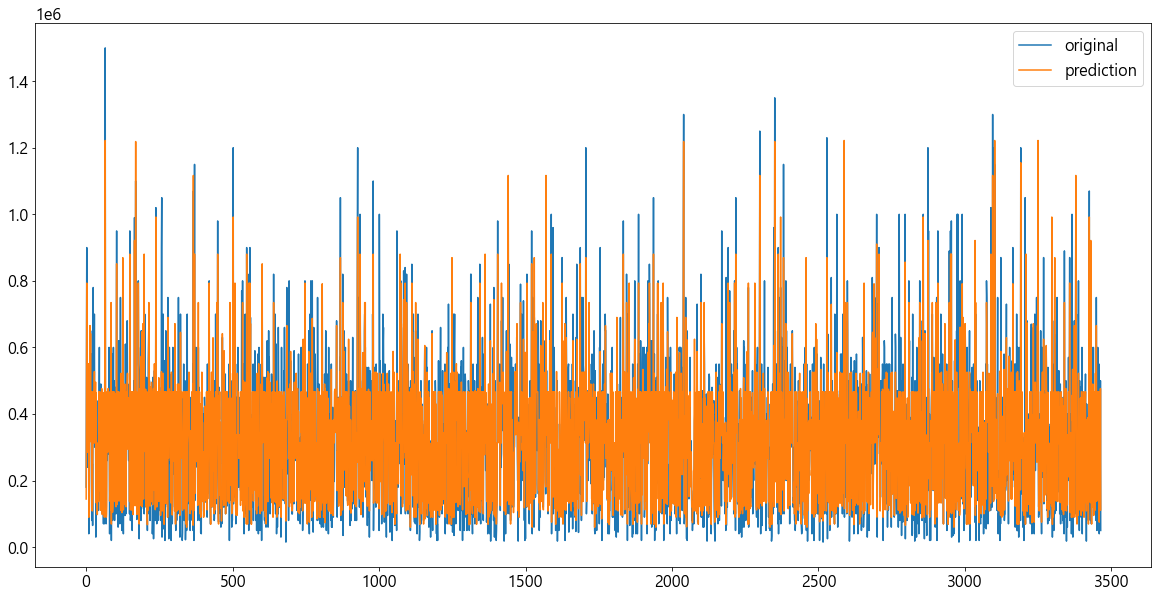

In [34]:
plt.plot(y_train.values, label='original')
plt.plot(y_train_pred, label='prediction')
plt.legend()
plt.show()

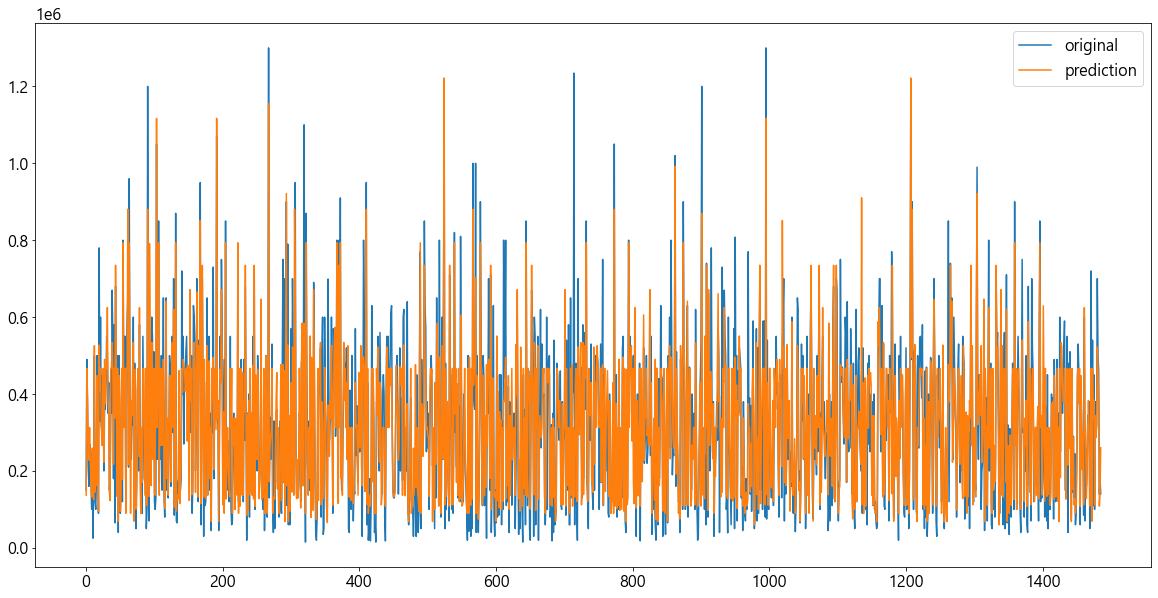

In [35]:
plt.plot(y_test.values, label='original')
plt.plot(y_test_pred, label='prediction')
plt.legend()
plt.show()

### 피처 엔지니어링

### 데이터 읽어오기

In [36]:
df = pd.read_csv('data10/used_mobile_phone.csv')
df

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


### create_date

In [37]:
from datetime import datetime
import time

In [42]:
# create_date 데이터를 수치적으로 환산하기 위해 unixtime(1970년 1월 1일 0시 0분
# 0초를 0으로 잡고 1ms 마다 1씩 증가시킨 값) 으로 변환한다.
def date_to_unixtime(date_str) :
    a1 = datetime.strptime(date_str, '%Y-%m-%d').timetuple()
    timestamp = time.mktime(a1)
    return timestamp

# 시간값을 모두 unixtime으로 변경한다.
df['create_unixtime'] = df['create_date'].apply(lambda x : date_to_unixtime(x[:10]))
df['create_unixtime']

0       1.489849e+09
1       1.477408e+09
2       1.477321e+09
3       1.490195e+09
4       1.460300e+09
            ...     
4946    1.476025e+09
4947    1.477235e+09
4948    1.474211e+09
4949    1.475593e+09
4950    1.474816e+09
Name: create_unixtime, Length: 4951, dtype: float64

In [45]:
# unixtime을 min-max 스케일링 작업을 한다
# 최소를 0으로 최대를 1로 맞추는 작업
min1 = df['create_unixtime'].min()
max1 = df['create_unixtime'].max()

df['create_time_score'] = ((df['create_unixtime'] - min1) / (max1 - min1))
df[['create_date', 'create_unixtime', 'create_time_score']]

,create_date,create_unixtime,create_time_score
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468
...,...,...,...
4946,2016-10-10 11 29 00 AM,1.476025e+09,0.601918
4947,2016-10-24 10 03 00 PM,1.477235e+09,0.635492
4948,2016-09-19 10 15 00 AM,1.474211e+09,0.551559
4949,2016-10-05 12 22 00 AM,1.475593e+09,0.589928


### phone_model

In [47]:
# 확인해보면 폰 모델에 전부 용량이 붙어있다.
df['phone_model'].value_counts().index

Index(['iphone 6 64gb', 'iphone 6 16gb', 'galaxy note3 32gb', 'iphone se 64gb',
       'galaxy note5 32gb', 'iphone 5s 16gb', 'wine smart jazz 4gb',
       'lg g5 32gb', 'galaxy s6 32gb', 'galaxy s7 32gb', 'iphone 6 128gb',
       'galaxy s4 32gb', 'galaxy s7 edge 32gb', 'lg u 32gb', 'g4 32gb',
       'galaxy note 2 32gb', 'iphone 7 128gb', 'galaxy s3 3g 8gb',
       'g3 cat.6 32gb', 'galaxy s6 64gb', 'galaxy note4 32gb',
       'galaxy note5 64gb', 'iphone 7 plus 128gb', 'optimus g 32gb',
       'lg g2 32gb', 'galaxy note7 64gb', 'galaxy s6 edge 32gb',
       'galaxy a8 2016 32gb', 'galaxy alpha 32gb', 'iphone 5 16gb', 'y6 8gb',
       'g pro2 32gb', 'galaxy grand max 16gb', 'vega iron2 32gb',
       'galaxy s6 edge plus 32gb', 'iphone 7 32gb', 'iphone 5s 32gb',
       'galaxy note3 neo 16gb', 'iphone 6s Plus 64gb', 'galaxy folder 8gb',
       'luna 16gb', 'galaxy s5 32gb', 'galaxy s6 edge 64gb',
       'galaxy s7 edge 64gb', 'im-100 32gb', 'iphone se 16gb',
       'galaxy note3 16gb'

In [51]:
# 띄어 쓰기 기준으로 잘라내어 제일 마지막 것을 용량으로 저장한다.
df['phone_model_storage'] = df['phone_model'].apply(lambda x : x.split(' ')[-1])
df['phone_model_storage']

0        64gb
1        32gb
2        32gb
3        32gb
4        32gb
        ...  
4946    256gb
4947    256gb
4948    256gb
4949    256gb
4950    128gb
Name: phone_model_storage, Length: 4951, dtype: object

In [58]:
# 용량을 뺀 단말기 모델을 따로 담는다.
df['phone_model_detail'] = df['phone_model'].apply(lambda x : ' '.join(x.split(' ')[:-1]))
df['phone_model_detail']

0             iphone 6
1       galaxy s6 edge
2            galaxy s6
3                lg g5
4                 lg u
             ...      
4946     iphone 7 plus
4947          iphone 7
4948          iphone 7
4949     iphone 7 plus
4950          iphone 7
Name: phone_model_detail, Length: 4951, dtype: object

In [60]:
model_counts = df['phone_model'].value_counts()
model_detail_counts = df['phone_model_detail'].value_counts()

display(len(model_counts))
display(len(model_detail_counts))

64

43

### phome_model 관련 딕셔너리를 생성

In [62]:
# 기종명 + 용량으로 출고가를 찾기 위한 딕셔너리를 생성한다.
model_to_factory_price_dict = {}

for index, row in df.iterrows() :
    model_concat = (row['phone_model_detail'], row['phone_model_storage'])
    
    if model_concat not in model_to_factory_price_dict :
        model_to_factory_price_dict[model_concat] = row['factory_price']
        
model_to_factory_price_dict

{('iphone 6', '64gb'): 924000,
 ('galaxy s6 edge', '32gb'): 979000,
 ('galaxy s6', '32gb'): 854000,
 ('lg g5', '32gb'): 836000,
 ('lg u', '32gb'): 396000,
 ('galaxy a7 2016', '16gb'): 599500,
 ('galaxy note 2', '32gb'): 1089000,
 ('g4', '32gb'): 825000,
 ('wine smart jazz', '4gb'): 242000,
 ('galaxy s4', '32gb'): 954800,
 ('g3 cat.6', '32gb'): 649000,
 ('iphone 7', '128gb'): 999000,
 ('iphone 6', '16gb'): 789800,
 ('vega iron2', '32gb'): 783200,
 ('optimus g', '32gb'): 968000,
 ('galaxy s3 3g', '8gb'): 904200,
 ('galaxy alpha', '32gb'): 748000,
 ('galaxy note3', '32gb'): 1067000,
 ('lg g2', '32gb'): 616000,
 ('galaxy note3 neo', '16gb'): 790000,
 ('vega secret up', '16gb'): 954800,
 ('galaxy note7', '64gb'): 988900,
 ('y6', '8gb'): 154000,
 ('galaxy note4', '32gb'): 396000,
 ('iphone 5', '16gb'): 484000,
 ('g pro2', '32gb'): 999000,
 ('iphone 4s', '16gb'): 814000,
 ('galaxy s5', '32gb'): 825000,
 ('galaxy grand max', '16gb'): 310000,
 ('luna', '16gb'): 449900,
 ('iphone se', '64gb'): 6

### 감성분석으로 물품의 상태 분류하기

In [63]:
# 거래 가격의 z-score를 계산한다.
# 이는 해당 데이터의 가격이 기종의 평균에 비해 어느정도 높거나 낮은지를 알수 있다.
a1 = df.groupby('phone_model_detail')['price']
df['price_by_group'] = a1.transform(lambda x : (x - x.mean()) / x.std())
df['price_by_group']

0       0.910563
1       1.003699
2       0.669017
3      -0.330426
4       1.014392
          ...   
4946    2.038137
4947    2.216613
4948    2.216613
4949    2.261922
4950    3.125102
Name: price_by_group, Length: 4951, dtype: float64

-1.3966616903783426
1.666982156397844


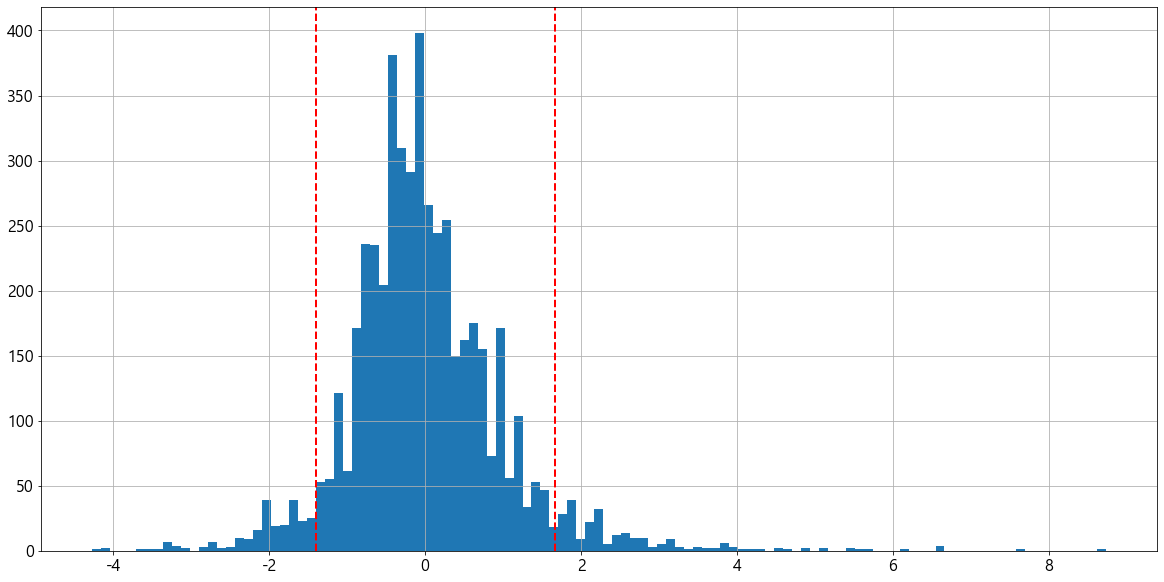

In [68]:
# z-score의 분포를 시각한다.
ax = df['price_by_group'].hist(bins='auto')

# 상위 95%, 하위 5% 위치 값을 가져온다.
lower_bound = df['price_by_group'].quantile(0.05)
upper_bound = df['price_by_group'].quantile(0.95)

# 선을 그린다
ax.axvline(x=lower_bound, color='r', linestyle='dashed', linewidth=2)
ax.axvline(x=upper_bound, color='r', linestyle='dashed', linewidth=2)

print(lower_bound)
print(upper_bound)

plt.show()

In [70]:
# lower_bound 이하면 0, upper_bound 이상이면 1, 그 중가이면 1로 설정한다.
def get_price_level(price, lower, upper) :
    if price <= lower :
        return '0'
    elif price >= upper :
        return '2'
    else :
        return '1'
    
a1 = df.groupby('phone_model_detail')['price']

# 같은 단말기 내에서 하위 5% 위치의 값을 담아준다.
df['price_lower'] = a1.transform(lambda x : x.quantile(0.05))
# 같은 단말기 내에서 상위 95% 위치의 값을 담아준다.
df['price_upper'] = a1.transform(lambda x : x.quantile(0.95))
# 하위 5%, 상위 95% 위치의 가격과 비교하여 가격 레벨을 설정해준다.
df['price_level'] = df.apply(lambda row : get_price_level(row['price'],
                                                         row['price_lower'],
                                                         row['price_upper']),
                                                          axis=1)
df[['price', 'price_lower', 'price_upper', 'price_level']]

,price,price_lower,price_upper,price_level
0,550000.0,180000.0,680000.0,1
1,380000.0,180000.0,414000.0,1
2,300000.0,150000.0,349000.0,1
3,290000.0,100000.0,500000.0,1
4,280000.0,18000.0,400000.0,1
...,...,...,...,...
4946,1300000.0,628200.0,1200000.0,2
4947,1300000.0,597000.0,1200000.0,2
4948,1300000.0,597000.0,1200000.0,2
4949,1350000.0,628200.0,1200000.0,2
